In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [21]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'1.13.1'

In [4]:
keras.__version__

'2.2.4-tf'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
type(X_train_full)

numpy.ndarray

In [7]:
X_train_full[:3]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [8]:
y_train_full[:3]

array([9, 0, 0], dtype=uint8)

In [9]:
X_train_full.shape

(60000, 28, 28)

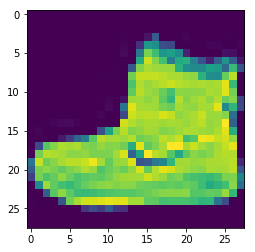

In [22]:
some_pic = X_train_full[0]
some_pic_image = some_pic.reshape(28,28)
plt.imshow(some_pic_image)
plt.show()

In [10]:
#create validation data as well, plus scaling down x values from 1-255 to 0-1 scale
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [24]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers

In [15]:
model.layers[1].name


'dense'

In [16]:
weights, biases = model.layers[1].get_weights()

In [17]:
weights

array([[-0.06058352,  0.06547663, -0.01424598, ..., -0.06105146,
         0.05962001,  0.01341774],
       [ 0.05669612, -0.02746091, -0.00638696, ..., -0.04038906,
        -0.02143535, -0.06804886],
       [-0.03512383, -0.05151367, -0.01793936, ..., -0.02406134,
        -0.00502093, -0.00164144],
       ...,
       [ 0.06651889,  0.06762986, -0.05919079, ..., -0.00168525,
         0.05566885, -0.02591149],
       [-0.06397845, -0.0576694 ,  0.07339618, ...,  0.07107514,
        -0.06621335, -0.04038477],
       [-0.01898543, -0.01914094, -0.03489045, ..., -0.0153207 ,
        -0.04615833,  0.01411142]], dtype=float32)

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [19]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 70us/sample - loss: 0.7177 - acc: 0.7628 - val_loss: 0.5084 - val_acc: 0.8312
Epoch 2/30
55000/55000 [==============================] - 4s 67us/sample - loss: 0.4915 - acc: 0.8294 - val_loss: 0.4485 - val_acc: 0.8466
Epoch 3/30
55000/55000 [==============================] - 4s 68us/sample - loss: 0.4439 - acc: 0.8438 - val_loss: 0.5036 - val_acc: 0.8176
Epoch 4/30
55000/55000 [==============================] - 4s 67us/sample - loss: 0.4172 - acc: 0.8532 - val_loss: 0.4089 - val_acc: 0.8566
Epoch 5/30
55000/55000 [==============================] - 4s 67us/sample - loss: 0.3952 - acc: 0.8610 - val_loss: 0.3799 - val_acc: 0.8710
Epoch 6/30
55000/55000 [==============================] - 4s 68us/sample - loss: 0.3797 - acc: 0.8676 - val_loss: 0.3781 - val_acc: 0.8712
Epoch 7/30
55000/55000 [==============================] - 4s 67us/sample - loss: 0.3659 - acc: 0.8705 - val_loss: 0.3

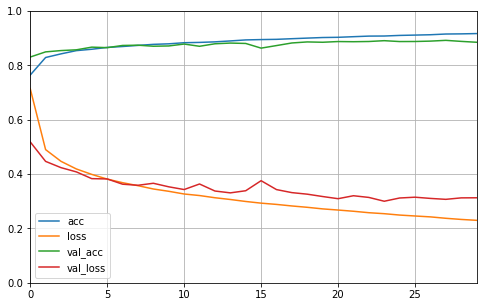

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [43]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 24us/sample - loss: 2.3965 - acc: 0.8489


[2.3965138593494872, 0.8489]

In [47]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [48]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)